<a href="https://colab.research.google.com/github/skappal7/Coursera-Data-science-Project/blob/master/Customer%20Churn%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# B**uilding a simple Customer Churn Model**

---


![alt text](https://skappal7.files.wordpress.com/2017/08/datadojo7.jpg?w=300)

** Creating Customer Churn Model**

In [0]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

**Read the Data**

In [49]:
df = pd.read_csv("Customer Churn Data.csv")
display(df.head(5))

,Escalation,Negative Experience,Chronic Caller,Competitor 1,Competitor 2,Competitor 3,Competitor 4,Customer <12 Months,$5 a Month,Low Bill,Expensive,Churn
0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0,1


** Understand the shape of your data**

In [50]:
print("Number of rows: ", df.shape[0])
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  4892


,Escalation,Negative Experience,Chronic Caller,Competitor 1,Competitor 2,Competitor 3,Competitor 4,Customer <12 Months,$5 a Month,Low Bill,Expensive,Churn
Count of values,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0,4892.0


**Variables that you want to get rid of**

In [0]:
df = df.drop(["Competitor 2", "Competitor 3", "Competitor 4"], axis=1)
features = df.drop(["Churn"], axis=1).columns

**Split the data**

In [0]:
df_train, df_test = train_test_split(df, test_size=0.25)

**Get your RandomForest Classifier in action**

In [53]:
clf = RandomForestClassifier(n_estimators=30)
clf.fit(df_train[features], df_train["Churn"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Let's make some predictions**

In [54]:
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 1, ..., 0, 1, 0])

**Evaluate the Model**

In [55]:
score = clf.score(df_test[features], df_test["Churn"])
print("Accuracy: ", score)

Accuracy:  0.5821749795584628


**Creating the Confusion Matrix & ROC**

,Predicted False,Predicted True
Actual False,501,119
Actual True,392,211


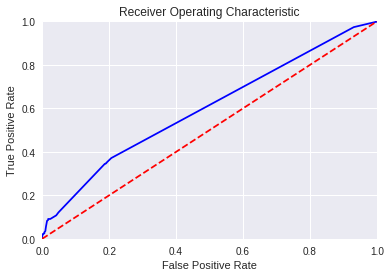

In [56]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Feature Importance Graph**

,importance,labels
2,0.262418,Chronic Caller
1,0.212726,Negative Experience
0,0.191030,Escalation
6,0.101421,Low Bill
4,0.083600,Customer <12 Months


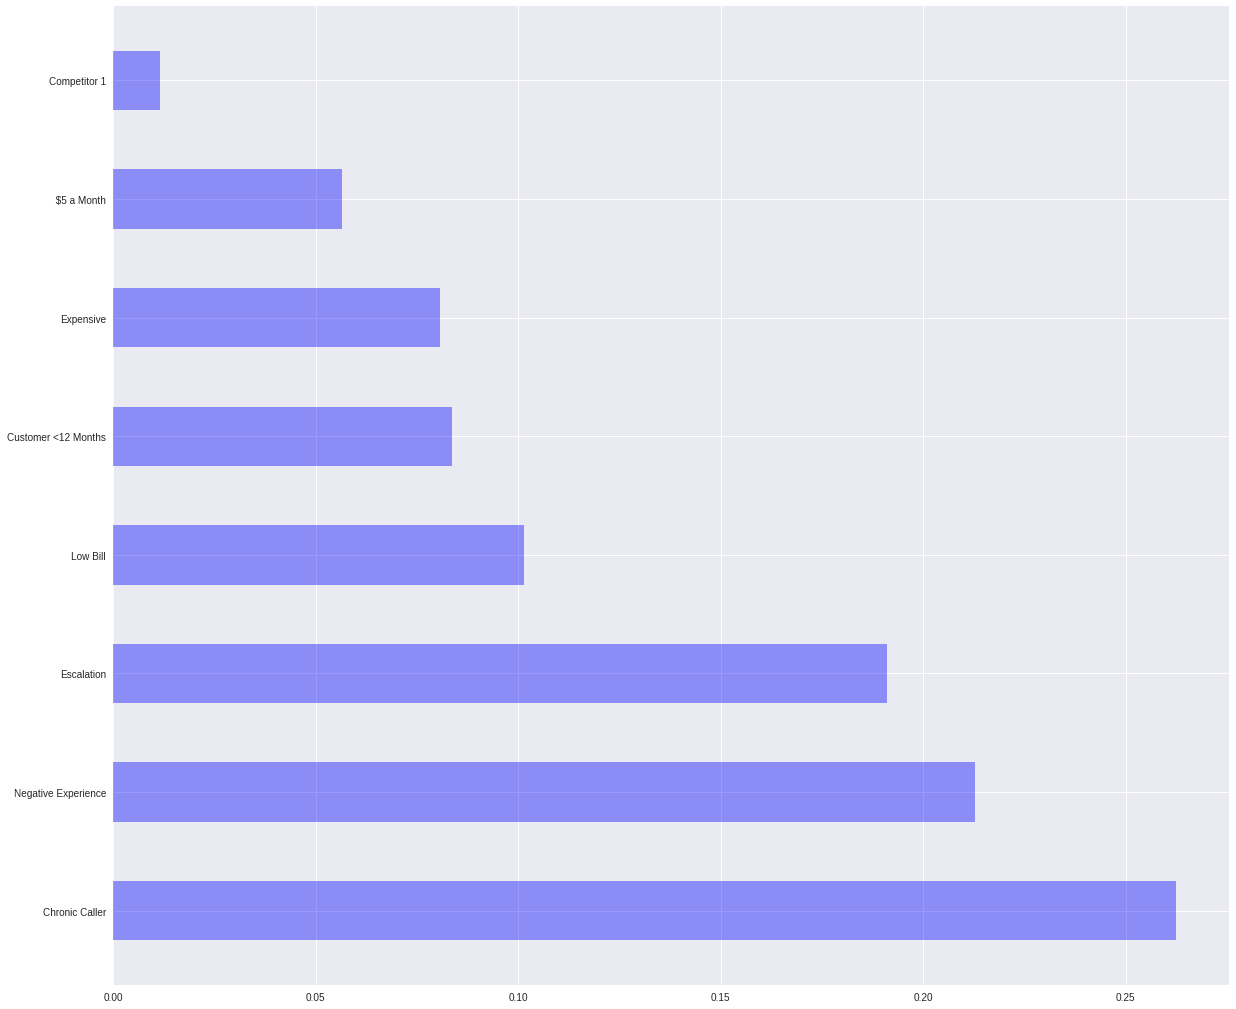

In [57]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

**Result**

In [58]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
71,1.000000
83,1.000000
35,0.970293
74,1.000000
73,1.000000
